<a href="https://colab.research.google.com/github/Jwalitsolanki/Oil-and-Gas_ML/blob/master/XeeX_lithology_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.pipeline import Pipeline
sns.set()
%matplotlib inline

In [ ]:
df = pd.read_csv('train.csv', sep=';')
df.head()

WELL  ...  FORCE_2020_LITHOFACIES_CONFIDENCE
0  15/9-13  ...                                1.0
1  15/9-13  ...                                1.0
2  15/9-13  ...                                1.0
3  15/9-13  ...                                1.0
4  15/9-13  ...                                1.0

[5 rows x 29 columns]

In [ ]:
df['FORMATION'].value_counts()

Utsira Fm.               172636
Kyrre Fm.                 66994
Lista Fm.                 63488
Heather Fm.               49028
Skade Fm.                 45983
                          ...  
Intra Balder Fm. Sst.       177
Flekkefjord Fm.             118
BASEMENT                    107
Egersund Fm.                105
Bryne Fm.                    74
Name: FORMATION, Length: 67, dtype: int64

In [ ]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

65000    640621
30000    153375
65030    134172
70000     51959
80000     30116
99000     15124
70032      8472
88000      8213
90000      3666
74000      1669
86000      1085
93000       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [ ]:
df.isna().sum()

WELL                                      0
DEPTH_MD                                  0
X_LOC                                 10561
Y_LOC                                 10561
Z_LOC                                 10561
GROUP                                  1278
FORMATION                            123260
CALI                                  81504
RSHA                                 460853
RMED                                  38174
RDEP                                  10770
RHOB                                 146405
GR                                        0
SGR                                  985677
NPHI                                 378574
PEF                                  459442
DTC                                   53992
SP                                   234986
BS                                   471132
ROP                                  578569
DTS                                  912421
DCAL                                 778296
DRHO                            

In [ ]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

Text(0.5, 1.0, 'Histogram representation for % presence of lithology in training dataset')

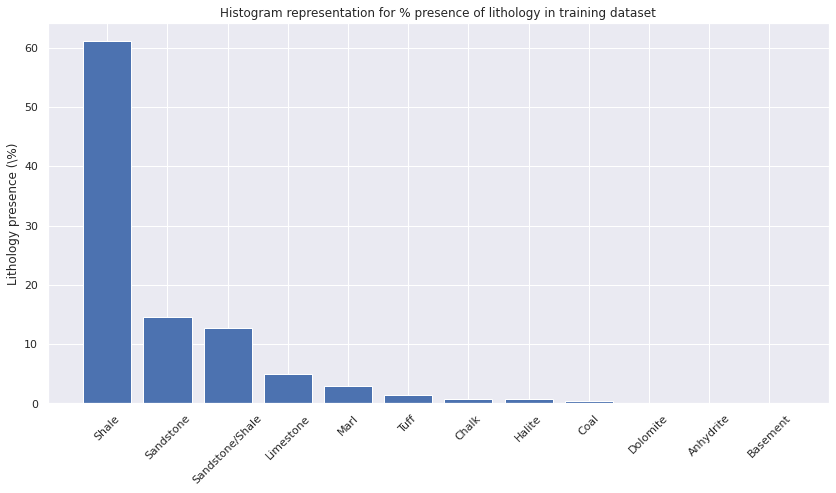

In [ ]:
counts = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
names = []
percentage = []
N = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]
for item in counts.iteritems():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(len(names)), height=percentage)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (\%)')
plt.title('Histogram representation for % presence of lithology in training dataset')

In [ ]:
counts_df = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].count()

In [ ]:
percentage = dict(df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts())

In [ ]:
percentage

{30000: 153375,
 65000: 640621,
 65030: 134172,
 70000: 51959,
 70032: 8472,
 74000: 1669,
 80000: 30116,
 86000: 1085,
 88000: 8213,
 90000: 3666,
 93000: 103,
 99000: 15124}

In [ ]:
for key, value in percentage.items():
  val = round(value/counts_df*100, 2)
  per = []
  name = []
  name.append(lithology_keys[key])
  print(name,':', val,'%')

['Shale'] : 61.09 %
['Sandstone'] : 14.63 %
['Sandstone/Shale'] : 12.8 %
['Limestone'] : 4.96 %
['Marl'] : 2.87 %
['Tuff'] : 1.44 %
['Chalk'] : 0.81 %
['Halite'] : 0.78 %
['Coal'] : 0.35 %
['Dolomite'] : 0.16 %
['Anhydrite'] : 0.1 %
['Basement'] : 0.01 %


Text(0, 0.5, 'Well presence (\\%)')

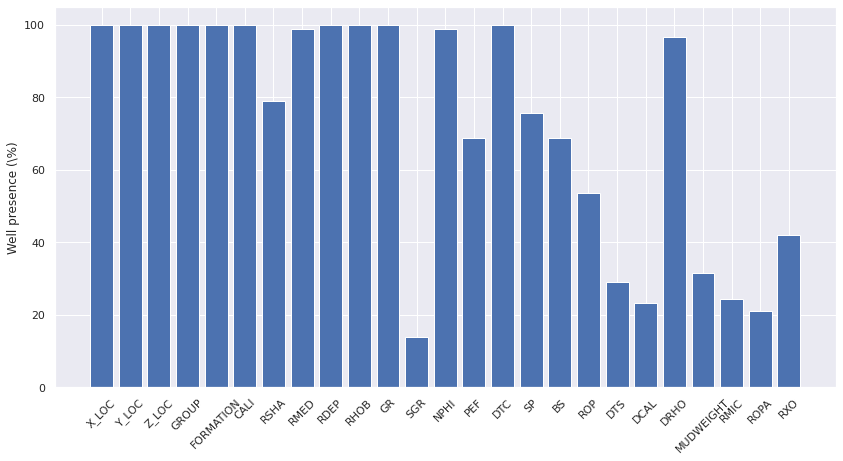

In [ ]:
occurences = np.zeros(25)
for well in df['WELL'].unique():
    occurences += df[df['WELL'] == well].isna().all().astype(int).values[2:-2]
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(occurences.shape[0]), height=(df.WELL.unique().shape[0]-occurences)/df.WELL.unique().shape[0]*100.0)
ax.set_xticklabels(df.columns[2:-2], rotation=45)
ax.set_xticks(np.arange(occurences.shape[0]))
ax.set_ylabel('Well presence (\%)')

In [ ]:
curve_list = list(df.columns)

In [ ]:
def curve_plot(log, df, depthname):
  aplot = df.hvplot(x=depthname, y=log, invert=True, flip_yaxis=True, shared_axes=True,
                       height=600, width=300).opts(fontsize={'labels': 16,'xticks': 14, 'yticks': 14})
  return aplot;

In [ ]:
!pip install hvplot

In [ ]:
import hvplot.pandas
import holoviews as hv
from holoviews import opts, streams
from holoviews.plotting.links import DataLink
hv.extension('bokeh', logo=None)

In [ ]:
plotlist = [curve_plot(x, df=df, depthname='DEPTH_MD') for x in curve_list]
well_section = hv.Layout(plotlist).cols(len(curve_list))
print(well_section)

:Layout
   .Curve.I      :Curve   [DEPTH_MD]   (WELL)
   .Curve.II     :Curve   [DEPTH_MD]   (DEPTH_MD)
   .Curve.III    :Curve   [DEPTH_MD]   (X_LOC)
   .Curve.IV     :Curve   [DEPTH_MD]   (Y_LOC)
   .Curve.V      :Curve   [DEPTH_MD]   (Z_LOC)
   .Curve.VI     :Curve   [DEPTH_MD]   (GROUP)
   .Curve.VII    :Curve   [DEPTH_MD]   (FORMATION)
   .Curve.VIII   :Curve   [DEPTH_MD]   (CALI)
   .Curve.IX     :Curve   [DEPTH_MD]   (RSHA)
   .Curve.X      :Curve   [DEPTH_MD]   (RMED)
   .Curve.XI     :Curve   [DEPTH_MD]   (RDEP)
   .Curve.XII    :Curve   [DEPTH_MD]   (RHOB)
   .Curve.XIII   :Curve   [DEPTH_MD]   (GR)
   .Curve.XIV    :Curve   [DEPTH_MD]   (SGR)
   .Curve.XV     :Curve   [DEPTH_MD]   (NPHI)
   .Curve.XVI    :Curve   [DEPTH_MD]   (PEF)
   .Curve.XVII   :Curve   [DEPTH_MD]   (DTC)
   .Curve.XVIII  :Curve   [DEPTH_MD]   (SP)
   .Curve.XIX    :Curve   [DEPTH_MD]   (BS)
   .Curve.XX     :Curve   [DEPTH_MD]   (ROP)
   .Curve.XXI    :Curve   [DEPTH_MD]   (DTS)
   .Curve.XXII   :Curve 

In [ ]:
hvplot.show(well_section)

Launching server at http://localhost:45961


In [ ]:
wells = df['WELL'].unique()

(3272.0240000000003, 494.528)

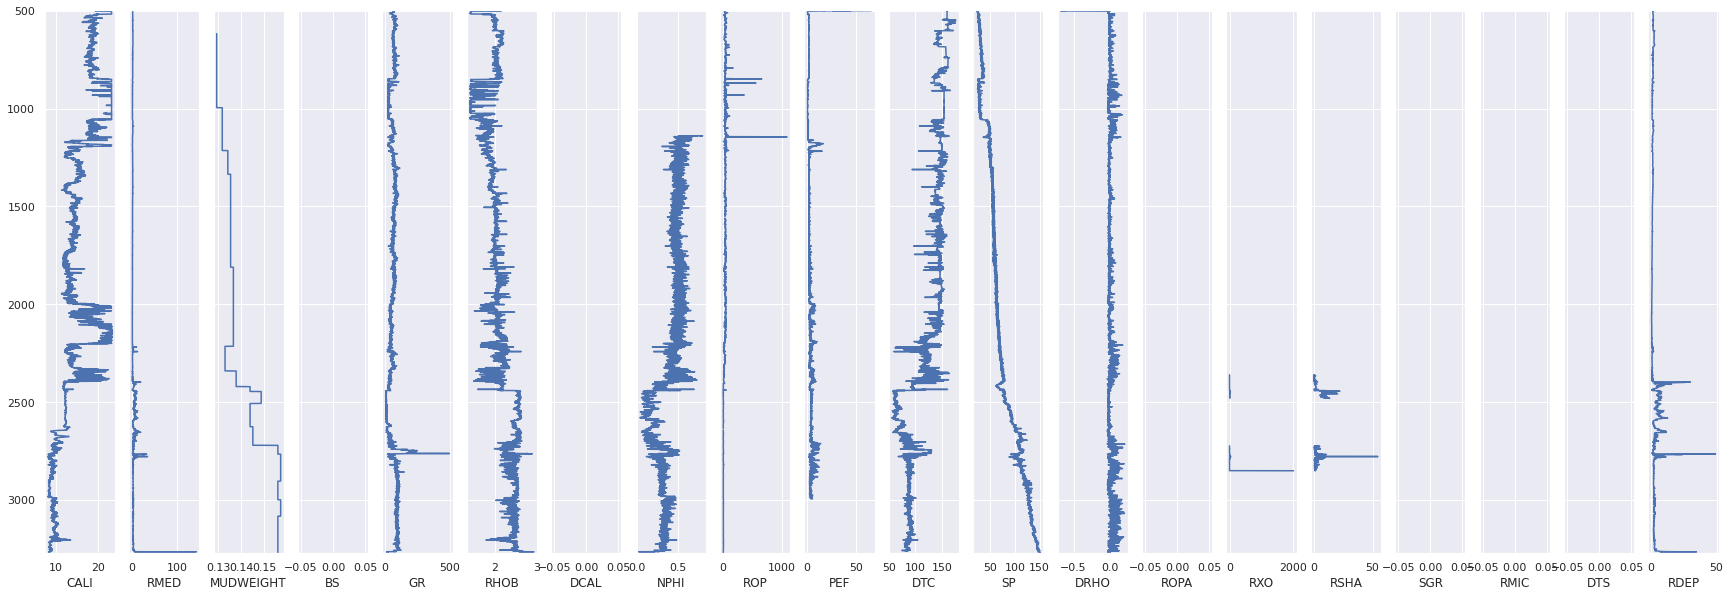

In [ ]:
well_data = df[df['WELL'] == wells[0]]
fig, axs = plt.subplots(1, len(well_data.columns)-9, figsize=(30, 10), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                                     'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                                                    'X_LOC', 'Y_LOC', 'Z_LOC'])):
    axs[ic].plot(well_data[col], well_data['DEPTH_MD'])
    axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['DEPTH_MD'].values[-1], well_data['DEPTH_MD'].values[0])

(2317.0523926, 997.99639258)

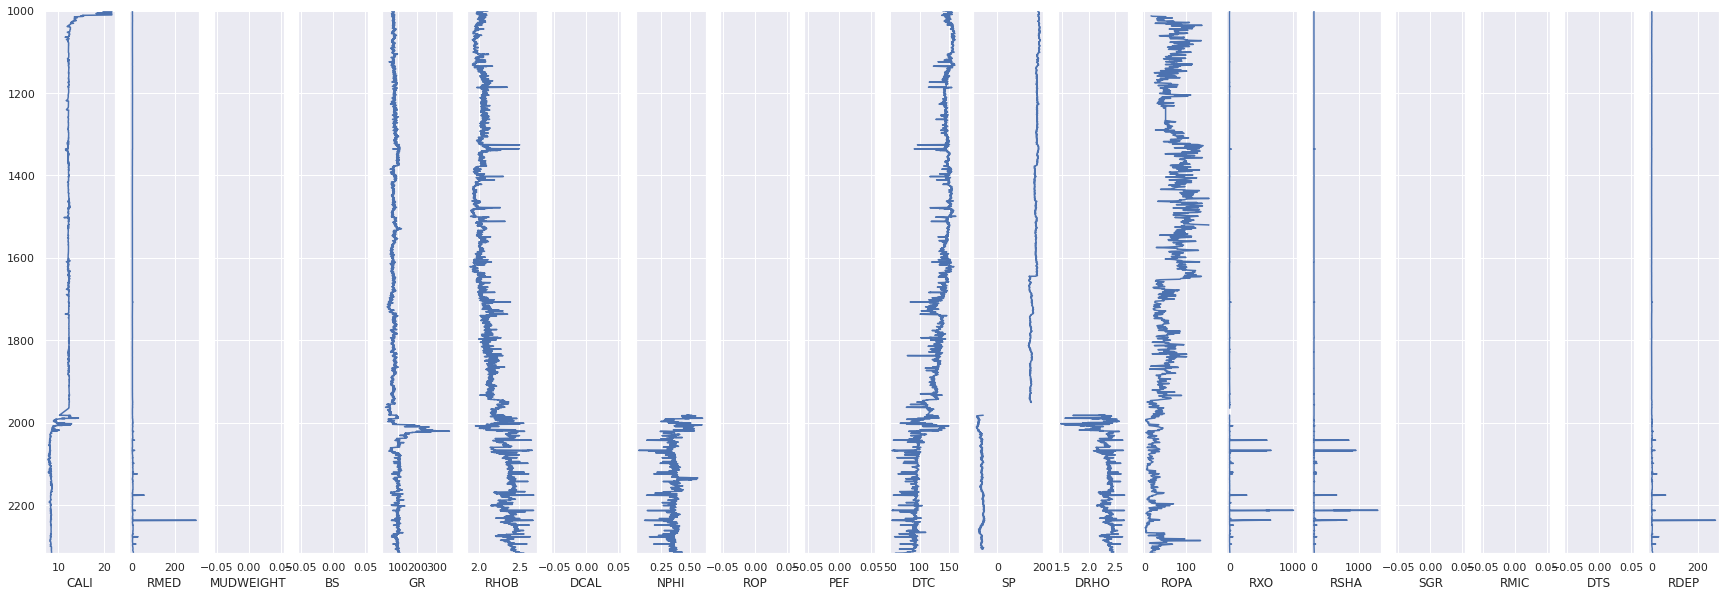

In [ ]:
well_data = df[df['WELL'] == wells[50]]
fig, axs = plt.subplots(1, len(well_data.columns)-9, figsize=(30, 10), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                                     'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                                                    'X_LOC', 'Y_LOC', 'Z_LOC'])):
    axs[ic].plot(well_data[col], well_data['DEPTH_MD'])
    axs[ic].set_xlabel(col)
axs[0].set_ylim(well_data['DEPTH_MD'].values[-1], well_data['DEPTH_MD'].values[0])

In [ ]:
X = df.drop(columns=['WELL', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'])

In [ ]:
X.fillna(0, inplace=True)

In [ ]:
X.head()

DEPTH_MD         X_LOC      Y_LOC       Z_LOC  ... MUDWEIGHT RMIC  ROPA  RXO
0   494.528  437641.96875  6470972.5 -469.501831  ...       0.0  0.0   0.0  0.0
1   494.680  437641.96875  6470972.5 -469.653809  ...       0.0  0.0   0.0  0.0
2   494.832  437641.96875  6470972.5 -469.805786  ...       0.0  0.0   0.0  0.0
3   494.984  437641.96875  6470972.5 -469.957794  ...       0.0  0.0   0.0  0.0
4   495.136  437641.96875  6470972.5 -470.109772  ...       0.0  0.0   0.0  0.0

[5 rows x 26 columns]

In [ ]:
y = df['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [ ]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}

In [ ]:
y = y.map(lithology_numbers)

In [ ]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

In [ ]:
X.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI',
       'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP',
       'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO'],
      dtype='object')

In [ ]:
X = X[['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'DTS']]

In [ ]:
X.head()

DEPTH_MD       CALI       RSHA  ...          SP     BS  DTS
781974  3581.610403   9.619938   9.385963  ...   58.267849  0.000  0.0
937737  2949.521023   8.093700   0.000000  ...   65.529770  8.375  0.0
907828  2556.870000  12.624901   2.022460  ...  135.685516  0.000  0.0
784628  3985.018403   8.098071  40.620010  ...   64.803612  0.000  0.0
662460  2863.652796   8.071250   0.000000  ...  133.104736  0.000  0.0

[5 rows x 13 columns]

In [ ]:
A = ([[0.   , 2.   , 3.5  , 3.   , 3.75 , 3.5  , 3.5  , 4.   , 4.   ,
        2.5  , 3.875, 3.25 ],
       [2.   , 0.   , 2.375, 2.75 , 4.   , 3.75 , 3.75 , 3.875, 4.   ,
        3.   , 3.75 , 3.   ],
       [3.5  , 2.375, 0.   , 2.   , 3.5  , 3.5  , 3.75 , 4.   , 4.   ,
        2.75 , 3.25 , 3.   ],
       [3.   , 2.75 , 2.   , 0.   , 2.5  , 2.   , 2.25 , 4.   , 4.   ,
        3.375, 3.75 , 3.25 ],
       [3.75 , 4.   , 3.5  , 2.5  , 0.   , 2.625, 2.875, 3.75 , 3.25 ,
        3.   , 4.   , 3.625],
       [3.5  , 3.75 , 3.5  , 2.   , 2.625, 0.   , 1.375, 4.   , 3.75 ,
        3.5  , 4.   , 3.625],
       [3.5  , 3.75 , 3.75 , 2.25 , 2.875, 1.375, 0.   , 4.   , 3.75 ,
        3.125, 4.   , 3.75 ],
       [4.   , 3.875, 4.   , 4.   , 3.75 , 4.   , 4.   , 0.   , 2.75 ,
        3.75 , 3.75 , 4.   ],
       [4.   , 4.   , 4.   , 4.   , 3.25 , 3.75 , 3.75 , 2.75 , 0.   ,
        4.   , 4.   , 3.875],
       [2.5  , 3.   , 2.75 , 3.375, 3.   , 3.5  , 3.125, 3.75 , 4.   ,
        0.   , 2.5  , 3.25 ],
       [3.875, 3.75 , 3.25 , 3.75 , 4.   , 4.   , 4.   , 3.75 , 4.   ,
        2.5  , 0.   , 4.   ],
       [3.25 , 3.   , 3.   , 3.25 , 3.625, 3.625, 3.75 , 4.   , 3.875,
        3.25 , 4.   , 0.   ]])

In [ ]:
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [ ]:
print(X_test.shape)
print(X_train.shape)

(262144, 13)
(786431, 13)


In [ ]:
X_train.shape

(786431, 13)

In [ ]:
k_values = {}
k=1

while k <= 5:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    performance = metrics.accuracy_score(y_test, predictions)
    k_values[k] = round(performance, 4)
    k += 1